In [11]:
import pandas as pd
board_games = pd.read_csv("C:/Python/games.csv")
print(len(board_games))
board_games.dropna(axis = 0, inplace = True)
print(len(board_games))
board_games = board_games[board_games["users_rated"]!=0]
print(len(board_games))

81312
81268
56894


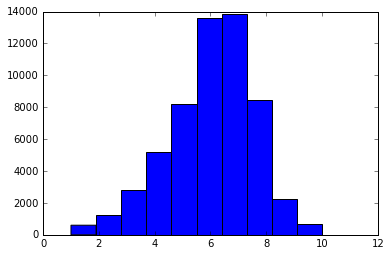

standard Dev
1.5788160595839211
average
6.016112849333889


In [18]:
import matplotlib.pyplot as plt
import numpy as numpy
%matplotlib inline  
plt.hist(board_games["average_rating"])
plt.show()
print("standard Dev")
print(numpy.std(board_games["average_rating"]))
print("average")
print(numpy.mean(board_games["average_rating"]))

I'll use RMSE as the error metric for the prediction

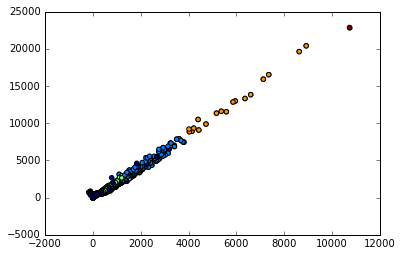

In [25]:
from sklearn.cluster import KMeans
k_means = KMeans(5)
numeric_columns = board_games.drop(["name", "type", "id"], axis = 1)
k_means.fit(numeric_columns)
labels = k_means.labels_
game_mean = numeric_columns.apply(numpy.mean, axis = 1)
game_std = numeric_columns.apply(numpy.std, axis = 1)
plt.scatter(x = game_mean, y = game_std, c = labels)
plt.show()

There appears to be a linear relationship between the mean and standard deviation. The orange group seems to have it's own grouping.

In [27]:
correlations = numeric_columns.corr()
print(correlations["average_rating"])

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


average_weight might be over fitting. It would be good to look up the documentation as to how this was calculated. I would also drop the minplayers and maxplayers. 

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
fit_data = numeric_columns.drop(["bayes_average_rating", "minplayers", "maxplayers", "average_rating"], axis = 1)
reg.fit(fit_data, numeric_columns["average_rating"])
predictions = reg.predict(fit_data)
mse = mean_squared_error(board_games["average_rating"], predictions)
print("MSE")
print(mse)
print("RMSE")
print(numpy.sqrt(mse))

MSE
2.09652540835
RMSE
1.4479383303


The RMSE says that on a 10 point scale, we can expect the predicted score to be about 1.4 points off on average.